### Capítulo 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def typecast_float(value):
    try:
        return float(value.replace(',', ''))
    except:
        return value

In [28]:
tabela21 = pd.read_excel('dados/Dados_EB.xls', sheet_name='Tabela 2.1')
CDBrasil = pd.read_excel('dados/Dados_EB.xls', sheet_name='CD-Brasil', converters={'Unnamed: 2': typecast_float, 'Unnamed: 3': typecast_float}) 

In [139]:
def tabela_frequencia(tabela, coluna): 
    '''
    Função que gera tabela de distribuição de frequências para a coluna de uma tabela desejada.
    '''
    if type(tabela[f'{coluna}'][0]) == str:
        freq_abs = tabela[f'{coluna}'].value_counts()
        freq_rel = tabela[f'{coluna}'].value_counts(normalize=True)*100
        dist_freq = pd.DataFrame({'Frequência Absoluta': freq_abs, 'Frequência Relativa': round(freq_rel,2)})
        return dist_freq
    else:
        k = round(1 + np.log2(len(tabela[f'{coluna}']))) # número de classes
        lsup = tabela[f'{coluna}'].max() # limite superior
        linf = tabela[f'{coluna}'].min() # limite inferior
        amplitude = lsup - linf # amplitude
        intervalo = amplitude/k # intervalo
        classes = []
        for i in range(k):
            classes.append(round(linf + i*intervalo, 2))

        labels = []
        for i in range(len(classes)-1):
            labels.append(f'{classes[i]} a {classes[i+1]}')

        frequencia = pd.value_counts(pd.cut(x=tabela[f'{coluna}'], bins=classes, labels=labels, include_lowest=True), sort=False)
        percentual = pd.value_counts(pd.cut(x = tabela[f'{coluna}'],bins = classes, labels = labels,include_lowest = True), normalize = True, sort=False)*100
        percentual

        dist_freq = pd.DataFrame({'Frequência Absoluta': frequencia, 'Frequência Relativa': round(percentual,2)})
        return dist_freq



#### 2. Usando os dados da Tabela 2.1, construa a distribuição de freqüências das variáveis:
(a) Estado civil.
(b) Região de procedência.
(c) Número de filhos dos empregados casados.
(d) Idade.

In [29]:
tabela21.rename(columns=tabela21.iloc[0],inplace=True)
tabela21.drop(tabela21.index[0], inplace=True)
tabela21 = tabela21.reset_index(drop=True)

In [30]:
tabela21.head()

,N,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
0,1,solteiro,ensino fundamental,NaN,4,26,3,interior
1,2,casado,ensino fundamental,1,4.56,32,10,capital
2,3,casado,ensino fundamental,2,5.25,36,5,capital
3,4,solteiro,ensino médio,NaN,5.73,20,10,outra
4,5,solteiro,ensino fundamental,NaN,6.26,40,7,outra


##### Estado Civil

In [112]:
tabela_frequencia(tabela21, 'Estado Civil')

,Frequência Absoluta,Frequência Relativa
casado,20,55.56
solteiro,16,44.44


##### Região de Procedência

In [113]:
tabela_frequencia(tabela21, 'Região de Procedência')

,Frequência Absoluta,Frequência Relativa
outra,13,36.11
interior,12,33.33
capital,11,30.56


##### Número de filho dos empregados casados

In [140]:
tabela_casados = tabela21[tabela21['Estado Civil'] == 'casado'].reset_index(drop=True)
tabela_frequencia(tabela_casados, 'N de Filhos')

,Frequência Absoluta,Frequência Relativa
0.0 a 1.0,9,47.37
1.0 a 2.0,7,36.84
2.0 a 3.0,3,15.79
3.0 a 4.0,0,0.00


##### Idade

In [141]:
tabela_frequencia(tabela21, 'Anos')

,Frequência Absoluta,Frequência Relativa
20.0 a 24.67,2,6.06
24.67 a 29.33,6,18.18
29.33 a 34.0,10,30.30
34.0 a 38.67,7,21.21
38.67 a 43.33,8,24.24


#### 3. Para o conjunto Dados 1(CD-Brasil), construir distribuição de frequências para população urbana e densidade populacional.

In [126]:
CDBrasil.rename(columns=CDBrasil.iloc[3],inplace=True)
CDBrasil.drop(CDBrasil.index[0:4], inplace=True)
CDBrasil = CDBrasil.reset_index(drop=True)
CDBrasil.columns.values[0] = 'Região'
CDBrasil.columns.values[1] = 'Estado'
CDBrasil['Região'] = CDBrasil['Região'].astype(str)

In [127]:
# preencher valores vazios com o valor da célula acima
for i in range(0, len(CDBrasil)):
    if CDBrasil.iloc[i,0] == 'nan':
        CDBrasil.iloc[i,0] = CDBrasil.iloc[i-1,0]
    else:
        continue

##### População

In [142]:
tabela_frequencia(CDBrasil, 'População')

,Frequência Absoluta,Frequência Relativa
395725.0 a 30994289.33,29,90.62
30994289.33 a 61592853.67,2,6.25
61592853.67 a 92191418.0,1,3.12
92191418.0 a 122789982.33,0,0.00
122789982.33 a 153388546.67,0,0.00


##### Densidade

In [143]:
tabela_frequencia(CDBrasil, 'Densidade')

,Frequência Absoluta,Frequência Relativa
1.76 a 72.02,25,78.12
72.02 a 142.27,5,15.62
142.27 a 212.53,1,3.12
212.53 a 282.78,0,0.00
282.78 a 353.04,1,3.12


#### Para  o conjunto de números de erro de impressão: 
 - a) representar graficamente;
 - b) fazer histograma e ramo-e-folhas.

In [145]:
erros = [8, 11, 8, 12, 14, 13, 11, 14, 14, 15,
         6, 10, 14, 19, 6, 12, 7, 5, 8, 8,
         10, 16, 10, 12, 12, 8, 11, 6, 7, 12,
         7, 10, 14, 5, 12, 7, 9, 12, 11, 9,
         14, 8, 14, 8, 12, 10, 12, 22, 7, 15]

##### A) e B)

(array([ 5., 12.,  7.,  4., 10.,  9.,  1.,  0.,  1.,  1.]),
 array([ 5. ,  6.7,  8.4, 10.1, 11.8, 13.5, 15.2, 16.9, 18.6, 20.3, 22. ]),
 <BarContainer object of 10 artists>)

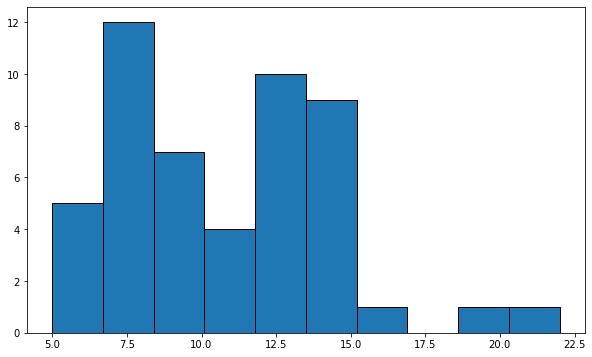

In [172]:
ax, fig = plt.subplots(figsize=(10,6))
plt.hist(erros, bins=(10), edgecolor='black')

(<Figure size 540x378 with 1 Axes>, <Axes:>)

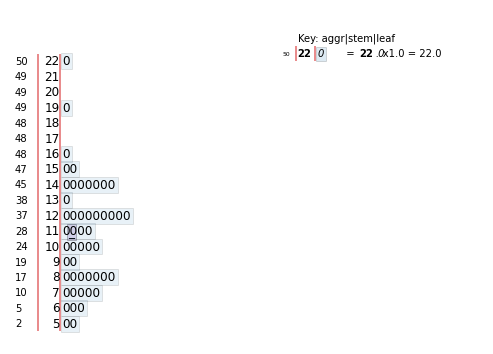

In [182]:
import stemgraphic

stemgraphic.stem_graphic(erros, scale=0)

##### 5) Usando resultados do problema 2 e tabela 2.3:
- a) fazer histrograma da idade;
- b) fazer um gráfico de grau de instrução